## HEART_ATTACK_ANALYSIS_PREDICTION 

In [1]:
# Importing Necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
df=pd.read_csv('heart_attack_analysis_dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Data Cleaning 
# Finding the Null Values
df.isna().sum() # As we seen there is no NaN values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Find Duplicate Values.
df[df.duplicated()] # We figure out there is one duplicate row i.e. row no. 164 now we have to drop that row.

# AS our dataset is already very small as compare to our problem if we drop any single row also it will affect our accuracy 
# and also disturb the dataset so here we doesnt remove any duplicate to avoid the above discussed problem.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:

# df.drop_duplicates(inplace=True)  # Dropping the duplicated row 

In [7]:
#df[df.duplicated()]       # lets confirm the duplicated row is deleted or not.

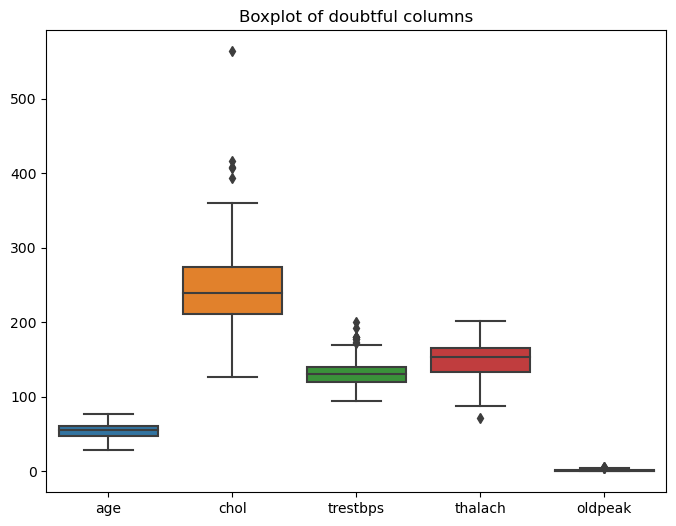

In [8]:
# Finding outliers by data visualization 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['age', 'chol','trestbps','thalach','oldpeak']]) # According to me these are the doubtful column for me to check outliers.
plt.title('Boxplot of doubtful columns')   # because most of the other columns are categorical.
plt.show() 

# Here in boxplot the circles can be considered as outliers but we have only the chol column which has the highest value and can be
# Considered as outliers but it doesnt affect our result because as the chol level increases there is more chances of the hear dieseas.

In [9]:
# Describe data columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Age : Age of the patient
#Sex : Sex of the patient
#exang: exercise induced angina (1 = yes; 0 = no)
#ca: number of major vessels (0-3)
#cp : Chest Pain type chest pain type
#Value 1: typical angina
#Value 2: atypical angina
#Value 3: non-anginal pain
#Value 4: asymptomatic
#trtbps : resting blood pressure (in mm Hg)
#chol : cholestoral in mg/dl fetched via BMI sensor
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#rest_ecg : resting electrocardiographic results
#Value 0: normal
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > #0.05 mV)
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thal: maximum heart rate achieved
#target : 0= less chance of heart attack 1= more chance of heart attack


In [11]:
categorical_column = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]

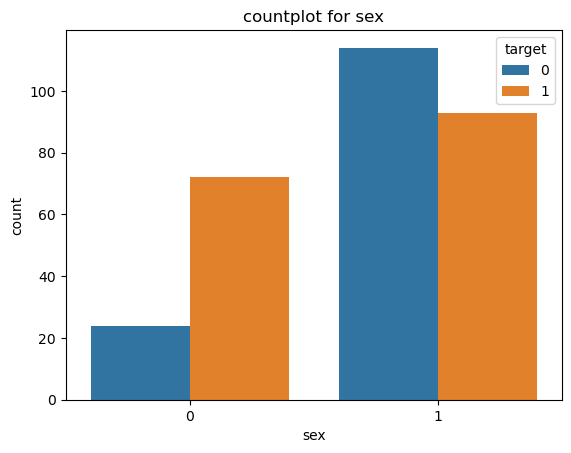

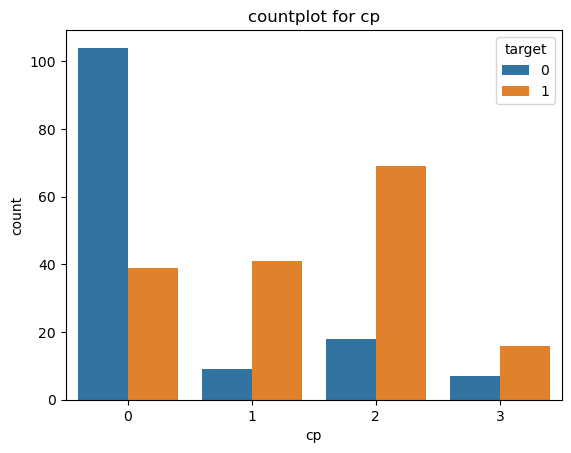

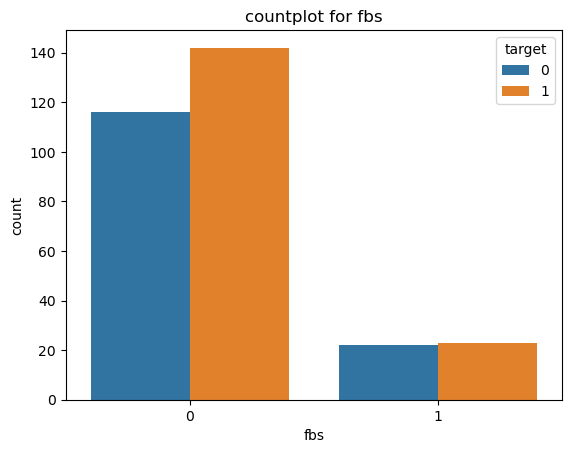

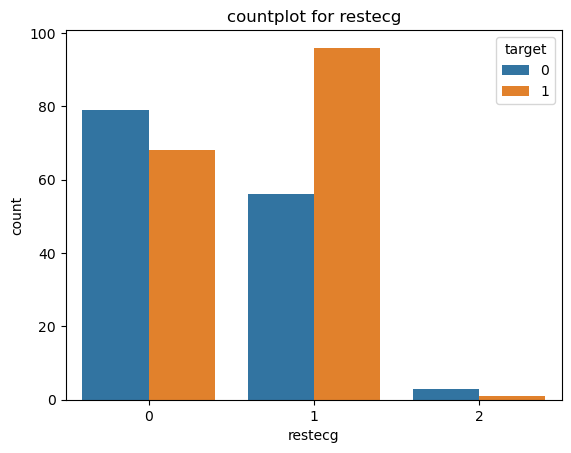

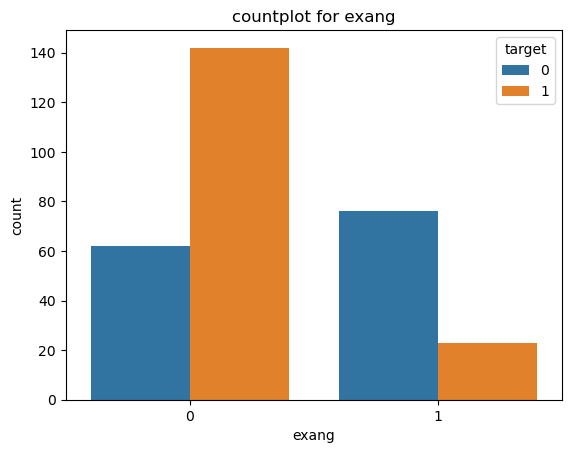

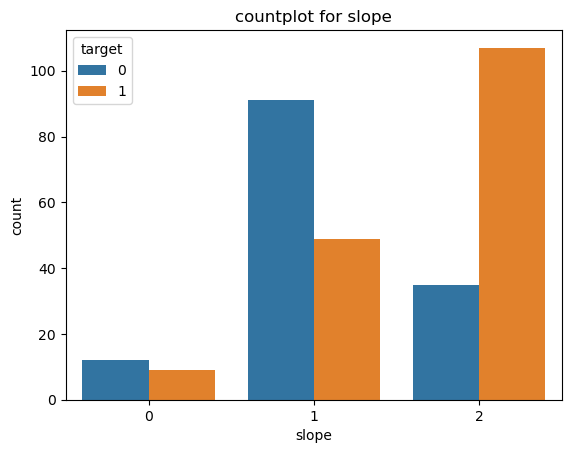

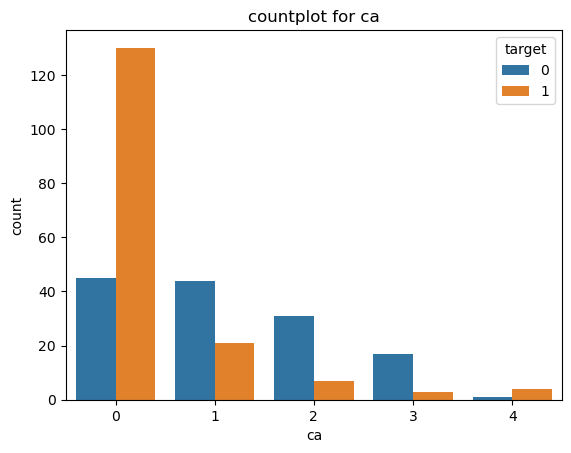

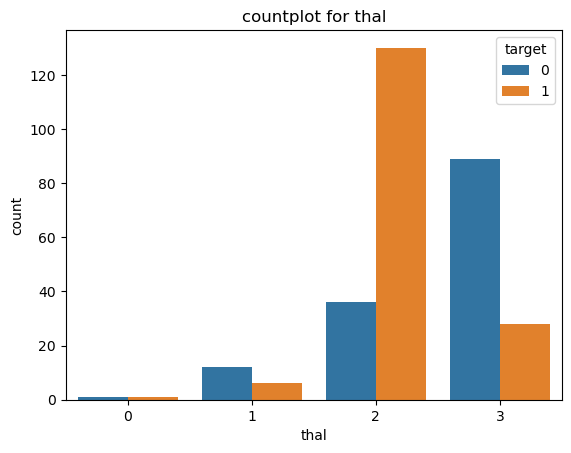

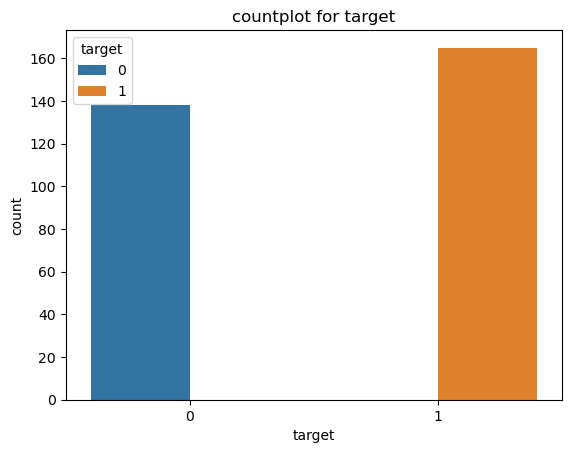

In [12]:
df_categoric = df.loc[:, categorical_column]
for i in categorical_column:
    plt.figure()
    sns.countplot(x = i, data=df_categoric, hue = "target")
    plt.title(f'countplot for {i}')

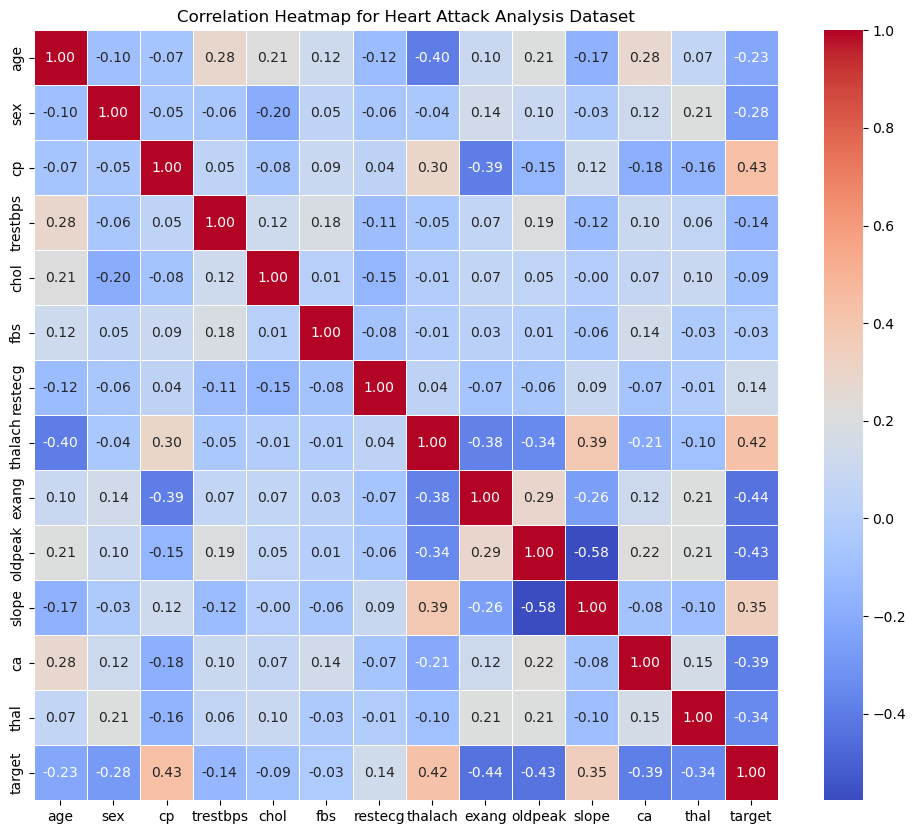

<Figure size 640x480 with 0 Axes>

In [13]:
# DATA VISUALIZATION 
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the plot title
plt.title('Correlation Heatmap for Heart Attack Analysis Dataset')

# Show the plot
plt.show()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

In [14]:
# I Figure out our dataset is already converted into the dummies and now we dont need to transform this dataset.
# And also our dataset already has less number of categories.

In [15]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [16]:
# Define categorical and numerical columns (adjust based on your dataset)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [17]:
from sklearn.compose import ColumnTransformer  #
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
# Pipeline for numerical features: scaling
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())  # StandardScaler adjust the numbers 
])
# It subtracts the average from each number and then divides by the standard deviation, 
#which basically makes the numbers more comparable and easier to work

In [19]:
# Pipeline for categorical features: encoding
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())  # One-hot encoding for categorical features
])
# if you have numbers that need scaling and categories that need encoding into 
#numbers for a computer to understand, a column transformer can handle these different tasks
#neatly, getting your data ready for analysis or modeling without causing confusion.

In [20]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])
#a ColumnTransformer, which is used to apply specific transformations to different columns of your dataset.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create Random Forest classifier
model= RandomForestClassifier(n_estimators=11, random_state=42,max_depth=5,min_samples_split=3,min_samples_leaf=3,max_features=10)

In [25]:
# Construct the final pipeline including preprocessing and model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])
# It sets up a pipeline to execute a series of steps in a specific order for machine learning tasks.

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Training the model
model_pipeline.fit(X_train, y_train)

# predicting the X_train first
y_pred = model_pipeline.predict(X_train)

# Calculate  accuracy of the training 
accuracy = accuracy_score(y_train, y_pred)
print(f" Training Accuracy: {accuracy:.2f}")



# Predicting the X_test 
y_pred = model_pipeline.predict(X_test)

# Calculate accuracy of the testing
accuracy = accuracy_score(y_test, y_pred)
print(f" Testing Accuracy: {accuracy:.2f}")

 Training Accuracy: 0.90
 Testing Accuracy: 0.90


In [28]:
from sklearn import set_config
set_config(display='diagram')
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_features=10,
                                        min_samples_leaf=3, min_samples_split=3,
                                        n_estimators=11, random_state=42))])

In [29]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')